In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('AI_Resume_Screening.csv')
data.head()

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
data.shape

(1000, 11)

In [5]:
data.describe()

,Resume_ID,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100)
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,4.896000,79994.486000,5.13300,83.950000
std,288.819436,3.112695,23048.472549,3.23137,20.983036
min,1.000000,0.000000,40085.000000,0.00000,15.000000
25%,250.750000,2.000000,60415.750000,2.00000,70.000000
50%,500.500000,5.000000,79834.500000,5.00000,100.000000
75%,750.250000,8.000000,99583.250000,8.00000,100.000000
max,1000.000000,10.000000,119901.000000,10.00000,100.000000


In [6]:
data.columns

Index(['Resume_ID', 'Name', 'Skills', 'Experience (Years)', 'Education',
       'Certifications', 'Job Role', 'Recruiter Decision',
       'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)'],
      dtype='object')

In [7]:
data.describe(include='O')

,Name,Skills,Education,Certifications,Job Role,Recruiter Decision
count,1000,1000,1000,726,1000,1000
unique,989,238,5,3,4,2
top,Sarah Jones,"Ethical Hacking, Networking",B.Sc,Deep Learning Specialization,AI Researcher,Hire
freq,3,11,205,255,257,812


In [8]:
data.nunique()

Resume_ID                 1000
Name                       989
Skills                     238
Experience (Years)          11
Education                    5
Certifications               3
Job Role                     4
Recruiter Decision           2
Salary Expectation ($)     993
Projects Count              11
AI Score (0-100)            18
dtype: int64

In [9]:
data['Experience (Years)'].value_counts()

Experience (Years)
3     106
1     102
6      99
5      95
7      93
8      91
0      89
9      86
2      82
4      80
10     77
Name: count, dtype: int64

In [10]:
data['Education'].value_counts()

Education
B.Sc      205
MBA       202
B.Tech    200
M.Tech    198
PhD       195
Name: count, dtype: int64

In [11]:
data['Certifications'].value_counts()

Certifications
Deep Learning Specialization    255
AWS Certified                   249
Google ML                       222
Name: count, dtype: int64

In [12]:
data['Job Role'].value_counts()

Job Role
AI Researcher            257
Data Scientist           255
Cybersecurity Analyst    255
Software Engineer        233
Name: count, dtype: int64

In [13]:
data['Skills'].value_counts()

Skills
Ethical Hacking, Networking                          11
SQL, Java                                            11
Python, Machine Learning                             11
SQL, Machine Learning                                10
Ethical Hacking, Linux                               10
                                                     ..
Cybersecurity, Linux, Networking                      1
Linux, Cybersecurity, Ethical Hacking, Networking     1
NLP, Python, Pytorch                                  1
SQL, React, Java, C++                                 1
NLP, Pytorch, TensorFlow, Python                      1
Name: count, Length: 238, dtype: int64

In [14]:
# less unique value - onehot encoder

# EXPLORATORY DATA ANALYSIS

In [15]:
data.head()

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [16]:
numerical_columns = data.select_dtypes(exclude='O')

In [17]:
# Standard deviation of numerical columns
for column in numerical_columns.columns:
    #std_col = numeric_cols[column].std()
    print(f'standard deviation of {column} is {numerical_columns[column].std()}')
    print('*' *20)

standard deviation of Resume_ID is 288.8194360957494
********************
standard deviation of Experience (Years) is 3.1126954352896252
********************
standard deviation of Salary Expectation ($) is 23048.472549361333
********************
standard deviation of Projects Count is 3.2313701045768077
********************
standard deviation of AI Score (0-100) is 20.98303571430456
********************


In [18]:
# Mean of numerical columns
for column in numerical_columns.columns:
    print(f'mean of {column} is {numerical_columns[column].mean()}')
    print('*'*20)

mean of Resume_ID is 500.5
********************
mean of Experience (Years) is 4.896
********************
mean of Salary Expectation ($) is 79994.486
********************
mean of Projects Count is 5.133
********************
mean of AI Score (0-100) is 83.95
********************


In [19]:
# Mode of numerical columns
for column in numerical_columns.columns:
    print(f'mode of {column} is {numerical_columns[column].mode().values[0]}')
    print('*'*20)

mode of Resume_ID is 1
********************
mode of Experience (Years) is 3
********************
mode of Salary Expectation ($) is 45733
********************
mode of Projects Count is 10
********************
mode of AI Score (0-100) is 100
********************


In [20]:
# Median of numerical columns
for column in numerical_columns.columns:
    median = numerical_columns[column].median()
    print(f'median of {column} is {median}')
    print('*'*20)

median of Resume_ID is 500.5
********************
median of Experience (Years) is 5.0
********************
median of Salary Expectation ($) is 79834.5
********************
median of Projects Count is 5.0
********************
median of AI Score (0-100) is 100.0
********************


In [21]:
# Initializing lists to store statistics
std_list = []
mean_list = []
median_list = []
mode_list = []
columns_list = numerical_columns.columns.tolist()

# Calculating statistics for each column
for column in numerical_columns.columns:
    std_list.append(numerical_columns[column].std())
    mean_list.append(numerical_columns[column].mean())
    median_list.append(numerical_columns[column].median())
    mode_list.append(numerical_columns[column].mode().values[0])

# Creating a DataFrame with the calculated statistics
stats_df = pd.DataFrame({
    'Columns': columns_list,
    'Standard Deviation': std_list,
    'Mean': mean_list,
    'Median': median_list,
    'Mode' : mode_list
})

stats_df


,Columns,Standard Deviation,Mean,Median,Mode
0,Resume_ID,288.819436,500.500,500.5,1
1,Experience (Years),3.112695,4.896,5.0,3
2,Salary Expectation ($),23048.472549,79994.486,79834.5,45733
3,Projects Count,3.231370,5.133,5.0,10
4,AI Score (0-100),20.983036,83.950,100.0,100


In [22]:
print(numerical_columns.skew())

Resume_ID                 0.000000
Experience (Years)        0.021785
Salary Expectation ($)    0.016317
Projects Count           -0.048854
AI Score (0-100)         -1.112361
dtype: float64


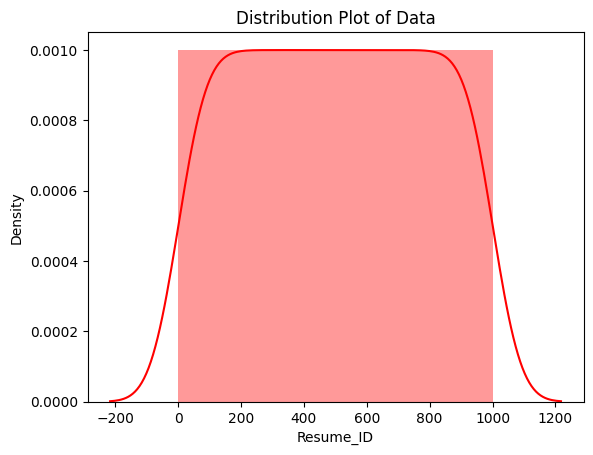

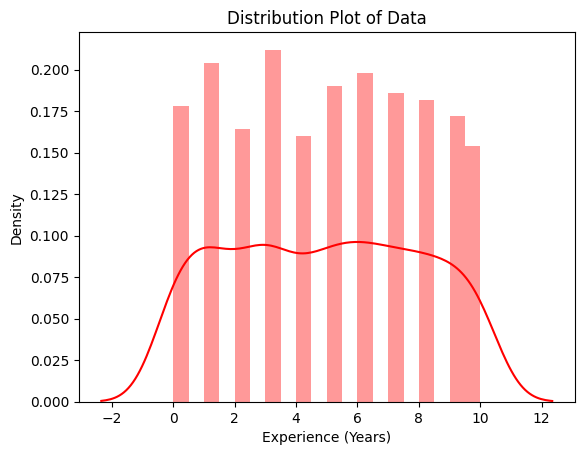

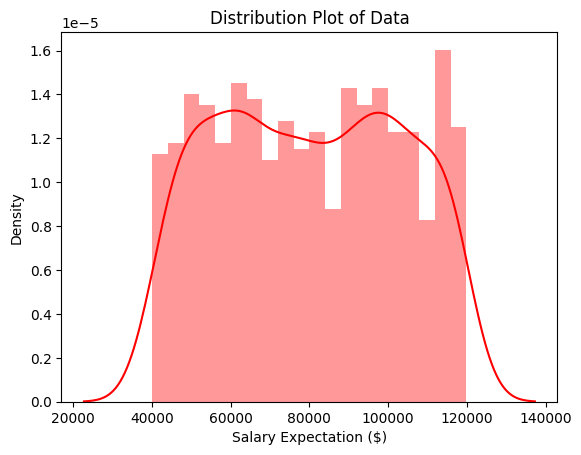

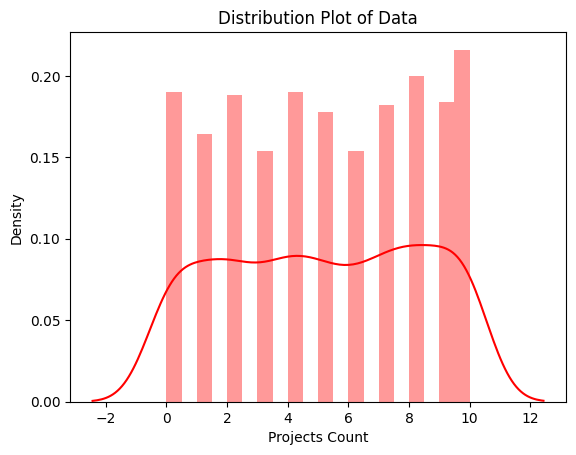

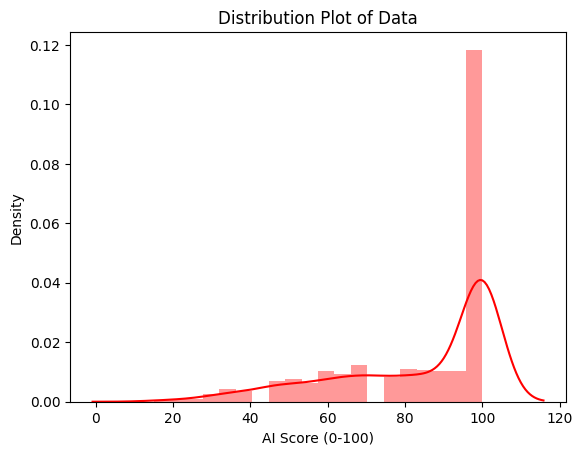

In [23]:
for i in numerical_columns.columns:
    sns.distplot(numerical_columns[i], bins=20, color='red')
    plt.title('Distribution Plot of Data')
    plt.show();

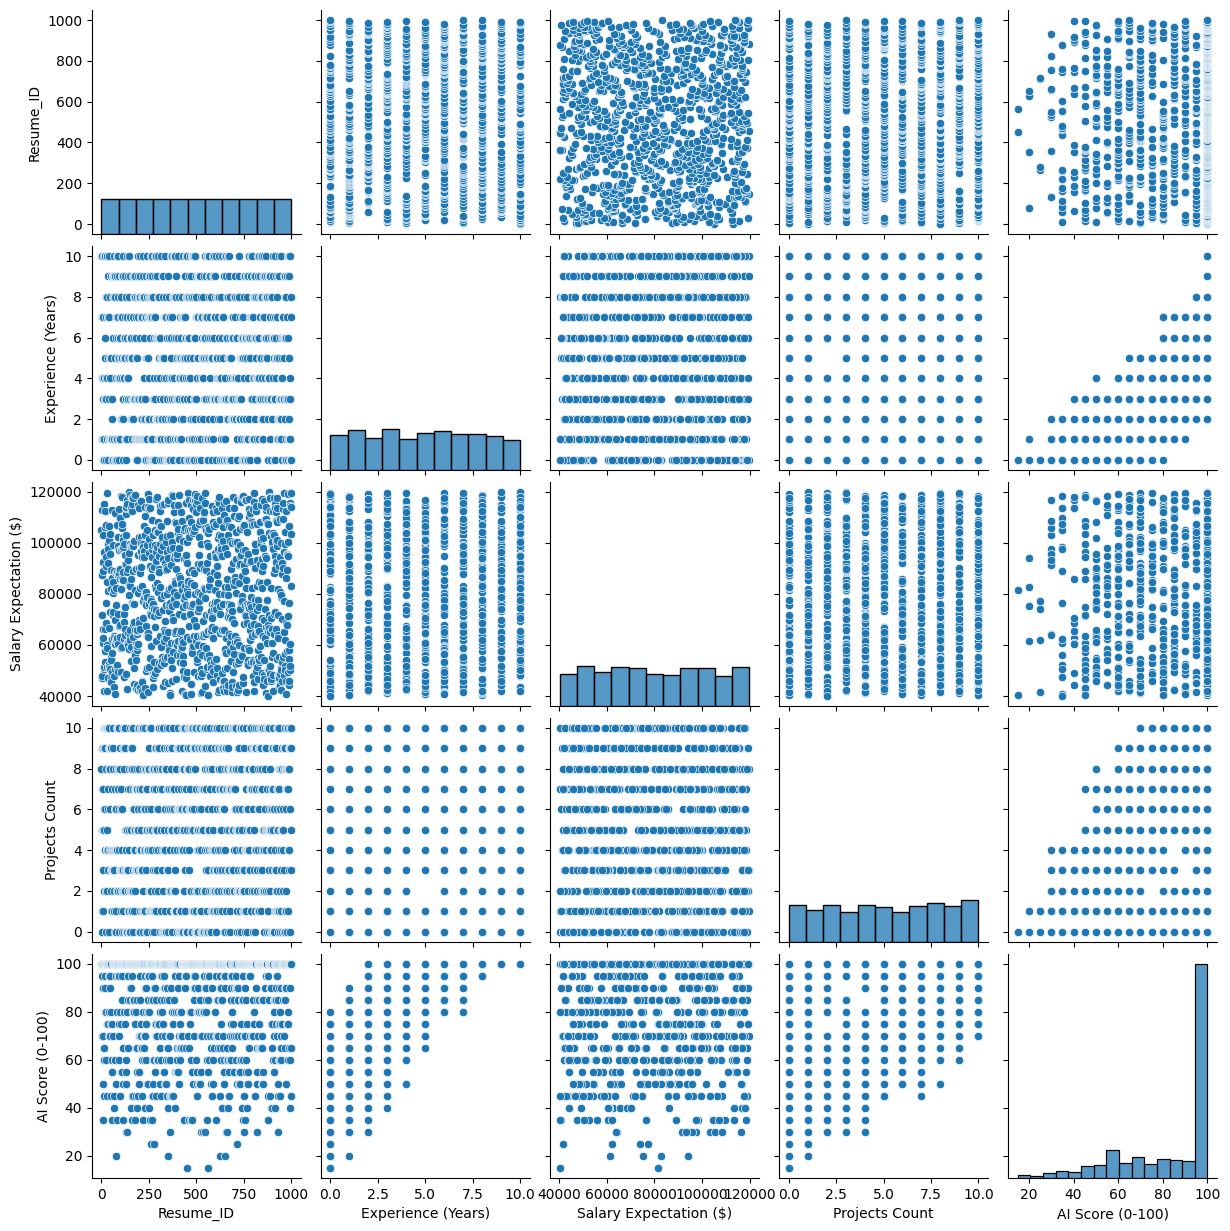

In [24]:
sns.pairplot(data=data);

In [25]:
correlation_matrix = numerical_columns.corr()
correlation_matrix

,Resume_ID,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100)
Resume_ID,1.000000,0.021094,0.001090,0.024475,0.029713
Experience (Years),0.021094,1.000000,0.034814,-0.066596,0.777042
Salary Expectation ($),0.001090,0.034814,1.000000,0.021759,0.033354
Projects Count,0.024475,-0.066596,0.021759,1.000000,0.358666
AI Score (0-100),0.029713,0.777042,0.033354,0.358666,1.000000


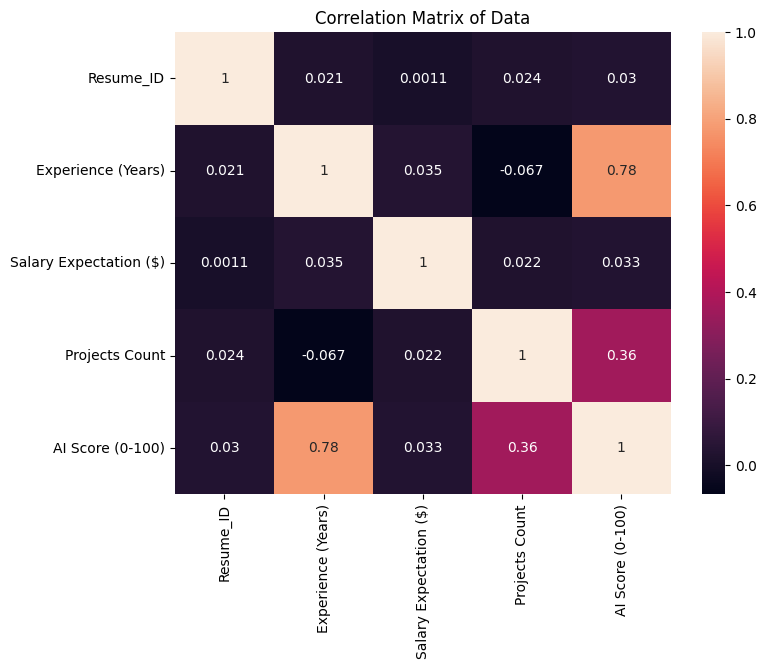

In [26]:
plt.figure(figsize = (8,6))
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Matrix of Data');

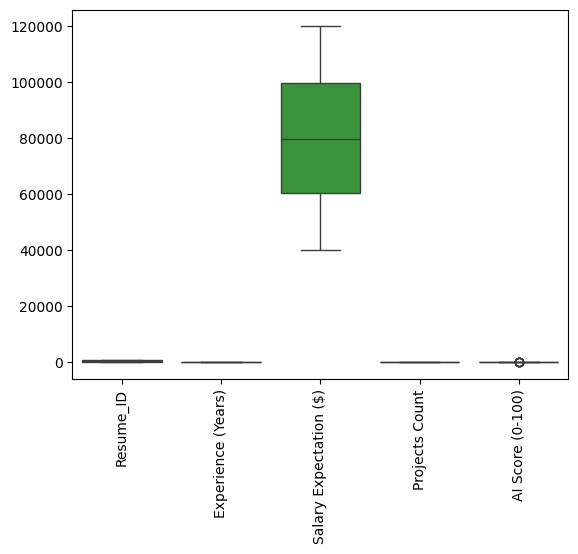

In [27]:
sns.boxplot(data)
plt.xticks(rotation=90);

In [28]:
numerical_columns.columns

Index(['Resume_ID', 'Experience (Years)', 'Salary Expectation ($)',
       'Projects Count', 'AI Score (0-100)'],
      dtype='object')

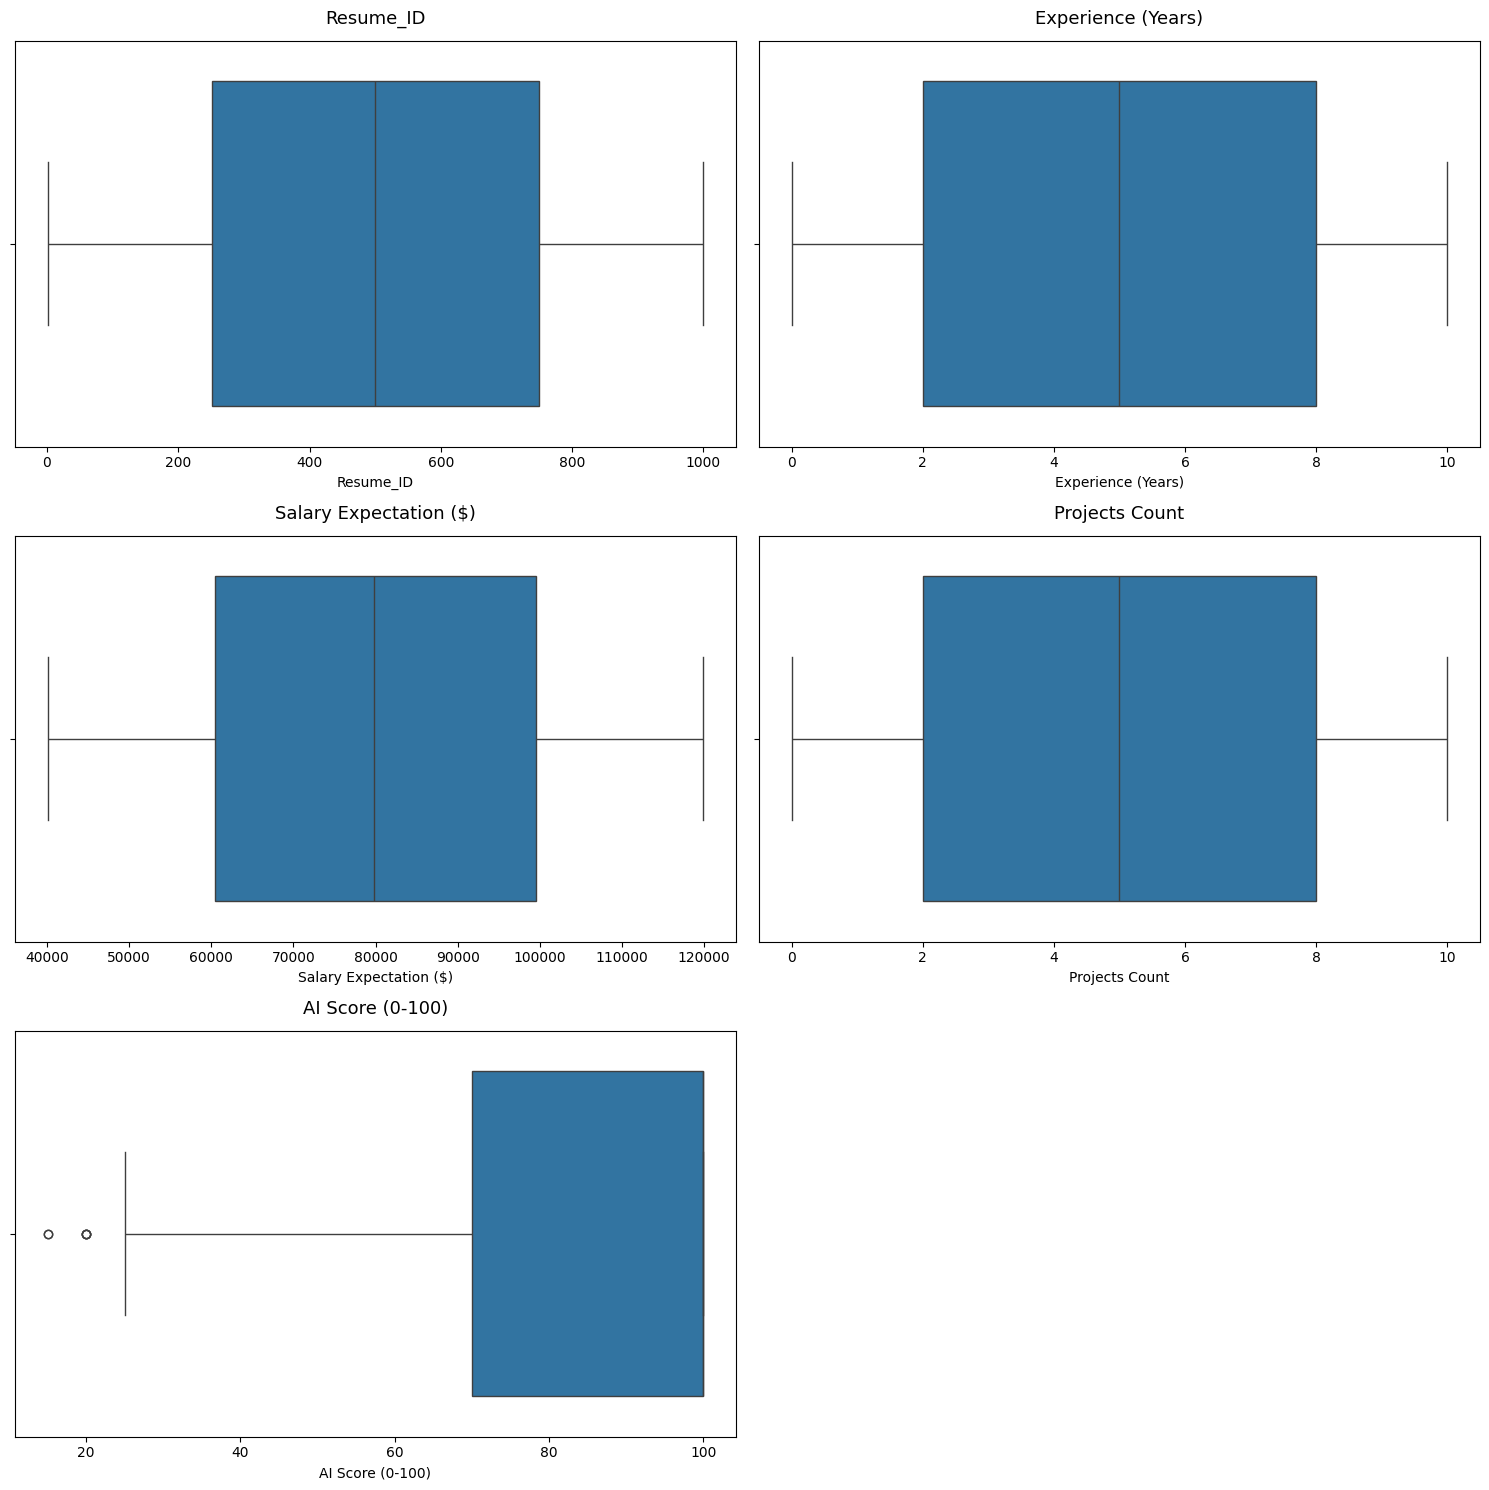

In [29]:
attr = numerical_columns.columns
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Adjusted for 3 rows and 2 columns
count = 0

for row in range(3):
    for col in range(2):
        if count < len(attr):
            sns.boxplot(data=numerical_columns, x=attr[count], ax=axs[row, col])
            axs[row, col].set_title(f"{attr[count]}", pad=12, fontsize=13)
            count += 1
        else:
            fig.delaxes(axs[row, col])  # Remove extra subplots

plt.tight_layout()
plt.show()

In [30]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['AI Score (0-100)'])

data[['AI Score (0-100)']] = winsor.fit_transform(data[['AI Score (0-100)']])

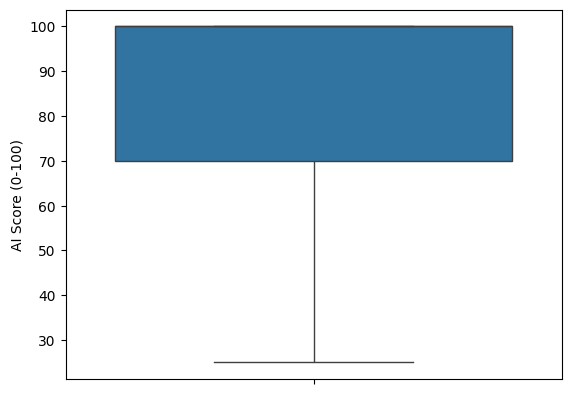

In [31]:
sns.boxplot(data['AI Score (0-100)']);

# DATA CLEANING AND PREPARATION

In [32]:
data.duplicated().sum()

0

In [33]:
data.isnull().sum()

Resume_ID                   0
Name                        0
Skills                      0
Experience (Years)          0
Education                   0
Certifications            274
Job Role                    0
Recruiter Decision          0
Salary Expectation ($)      0
Projects Count              0
AI Score (0-100)            0
dtype: int64

In [34]:
data['Certifications'].fillna('No Certifications', inplace=True)

In [35]:
data.isnull().sum()

Resume_ID                 0
Name                      0
Skills                    0
Experience (Years)        0
Education                 0
Certifications            0
Job Role                  0
Recruiter Decision        0
Salary Expectation ($)    0
Projects Count            0
AI Score (0-100)          0
dtype: int64

In [36]:
data.drop(columns=['Resume_ID', 'Name'], axis=1, inplace=True)

In [37]:
data.head()

,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,"TensorFlow, NLP, Pytorch",10,B.Sc,No Certifications,AI Researcher,Hire,104895,8,100
1,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,"SQL, React, Java",4,PhD,No Certifications,Software Engineer,Hire,87441,9,100


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Skills                  1000 non-null   object
 1   Experience (Years)      1000 non-null   int64 
 2   Education               1000 non-null   object
 3   Certifications          1000 non-null   object
 4   Job Role                1000 non-null   object
 5   Recruiter Decision      1000 non-null   object
 6   Salary Expectation ($)  1000 non-null   int64 
 7   Projects Count          1000 non-null   int64 
 8   AI Score (0-100)        1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


# DATA VISUALIZATION

# FEATURE ENGINEERING

In [39]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import TargetEncoder

In [40]:
data.head()

,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,"TensorFlow, NLP, Pytorch",10,B.Sc,No Certifications,AI Researcher,Hire,104895,8,100
1,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,"SQL, React, Java",4,PhD,No Certifications,Software Engineer,Hire,87441,9,100


In [41]:
x = data.drop(columns=['Skills','Recruiter Decision'], axis=1)
y = data['Recruiter Decision']

In [42]:
x.head()

,Experience (Years),Education,Certifications,Job Role,Salary Expectation ($),Projects Count,AI Score (0-100)
0,10,B.Sc,No Certifications,AI Researcher,104895,8,100
1,10,MBA,Google ML,Data Scientist,113002,1,100
2,1,MBA,Deep Learning Specialization,Cybersecurity Analyst,71766,7,70
3,7,B.Tech,AWS Certified,AI Researcher,46848,0,95
4,4,PhD,No Certifications,Software Engineer,87441,9,100


In [43]:
y

0        Hire
1        Hire
2        Hire
3        Hire
4        Hire
        ...  
995    Reject
996    Reject
997      Hire
998      Hire
999      Hire
Name: Recruiter Decision, Length: 1000, dtype: object

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.4, random_state = 42)

In [45]:
x_train

,Experience (Years),Education,Certifications,Job Role,Salary Expectation ($),Projects Count,AI Score (0-100)
17,3,B.Tech,No Certifications,Cybersecurity Analyst,66379,6,80
127,3,MBA,Deep Learning Specialization,AI Researcher,48726,0,50
322,5,B.Tech,No Certifications,Data Scientist,73559,10,100
255,6,B.Tech,Deep Learning Specialization,AI Researcher,72164,4,100
657,0,MBA,No Certifications,Cybersecurity Analyst,108549,2,30
...,...,...,...,...,...,...,...
106,9,B.Tech,AWS Certified,AI Researcher,105695,0,100
270,0,PhD,Google ML,Data Scientist,43642,7,60
860,8,B.Tech,AWS Certified,AI Researcher,94680,10,100
435,7,M.Tech,Deep Learning Specialization,Data Scientist,104836,5,100


In [46]:
y_train

17       Hire
127    Reject
322      Hire
255      Hire
657    Reject
        ...  
106      Hire
270    Reject
860      Hire
435      Hire
102    Reject
Name: Recruiter Decision, Length: 400, dtype: object

In [47]:
x_test

,Experience (Years),Education,Certifications,Job Role,Salary Expectation ($),Projects Count,AI Score (0-100)
521,9,B.Sc,No Certifications,AI Researcher,108379,10,100
737,6,MBA,AWS Certified,Cybersecurity Analyst,56096,8,100
740,5,MBA,AWS Certified,AI Researcher,77117,6,100
660,8,M.Tech,Google ML,Software Engineer,50950,8,100
411,4,PhD,No Certifications,Cybersecurity Analyst,87051,0,50
...,...,...,...,...,...,...,...
154,5,MBA,Deep Learning Specialization,Cybersecurity Analyst,53855,8,100
287,10,B.Tech,No Certifications,Data Scientist,92689,8,100
602,5,B.Sc,AWS Certified,Software Engineer,54536,0,70
569,2,M.Tech,AWS Certified,Software Engineer,83223,4,60


In [48]:
y_test

521      Hire
737      Hire
740      Hire
660      Hire
411    Reject
        ...  
154      Hire
287      Hire
602      Hire
569    Reject
743      Hire
Name: Recruiter Decision, Length: 600, dtype: object

In [49]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((400, 7), (400,), (600, 7), (600,))

In [50]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 17 to 102
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Experience (Years)      400 non-null    int64 
 1   Education               400 non-null    object
 2   Certifications          400 non-null    object
 3   Job Role                400 non-null    object
 4   Salary Expectation ($)  400 non-null    int64 
 5   Projects Count          400 non-null    int64 
 6   AI Score (0-100)        400 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 25.0+ KB


In [51]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 521 to 743
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Experience (Years)      600 non-null    int64 
 1   Education               600 non-null    object
 2   Certifications          600 non-null    object
 3   Job Role                600 non-null    object
 4   Salary Expectation ($)  600 non-null    int64 
 5   Projects Count          600 non-null    int64 
 6   AI Score (0-100)        600 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 37.5+ KB


# ENCODING AND NORMALIZING

In [52]:
numerical_columns = x.select_dtypes(exclude = 'O').columns
categorical_columns = ['Education','Certifications','Job Role']

In [53]:
labelencoder = LabelEncoder()

### TRAINING DATA

In [54]:
x_train.reset_index(drop = True, inplace = True)

In [55]:
y_train.reset_index(drop = True, inplace = True)

In [56]:
# x_train['Skills'] = labelencoder.fit_transform(x_train['Skills'])

In [57]:
# using frequency encoding in skills column

# freq_encoding = x_train['Skills'].value_counts(normalize=True)

# x_train['Skills'] = x_train['Skills'].map(freq_encoding)

In [58]:
# te = TargetEncoder()

# x_train['Skills'] = te.fit_transform(x_train['Skills'], y_train)

In [59]:
x_train.head()

,Experience (Years),Education,Certifications,Job Role,Salary Expectation ($),Projects Count,AI Score (0-100)
0,3,B.Tech,No Certifications,Cybersecurity Analyst,66379,6,80
1,3,MBA,Deep Learning Specialization,AI Researcher,48726,0,50
2,5,B.Tech,No Certifications,Data Scientist,73559,10,100
3,6,B.Tech,Deep Learning Specialization,AI Researcher,72164,4,100
4,0,MBA,No Certifications,Cybersecurity Analyst,108549,2,30


In [60]:
# x_train['Skills'].nunique()

In [61]:
onehotencoder = OneHotEncoder(sparse_output = False, drop = 'first')

In [62]:
x_train_ohe_encoded = onehotencoder.fit_transform(x_train[categorical_columns])

In [63]:
x_train_ohe_encoded.shape

(400, 10)

In [64]:
ohe_feature_names = onehotencoder.get_feature_names_out(input_features = categorical_columns)
ohe_feature_names

array(['Education_B.Tech', 'Education_M.Tech', 'Education_MBA',
       'Education_PhD', 'Certifications_Deep Learning Specialization',
       'Certifications_Google ML', 'Certifications_No Certifications',
       'Job Role_Cybersecurity Analyst', 'Job Role_Data Scientist',
       'Job Role_Software Engineer'], dtype=object)

In [65]:
x_train_ohe_encoded = pd.DataFrame(x_train_ohe_encoded, columns=ohe_feature_names)

In [66]:
x_train_ohe_encoded

,Education_B.Tech,Education_M.Tech,Education_MBA,Education_PhD,Certifications_Deep Learning Specialization,Certifications_Google ML,Certifications_No Certifications,Job Role_Cybersecurity Analyst,Job Role_Data Scientist,Job Role_Software Engineer
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
397,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [67]:
x_train_ohe_encoded.isnull().sum()

Education_B.Tech                               0
Education_M.Tech                               0
Education_MBA                                  0
Education_PhD                                  0
Certifications_Deep Learning Specialization    0
Certifications_Google ML                       0
Certifications_No Certifications               0
Job Role_Cybersecurity Analyst                 0
Job Role_Data Scientist                        0
Job Role_Software Engineer                     0
dtype: int64

In [68]:
x_train[ohe_feature_names] = x_train_ohe_encoded

In [69]:
x_train.head()

,Experience (Years),Education,Certifications,Job Role,Salary Expectation ($),Projects Count,AI Score (0-100),Education_B.Tech,Education_M.Tech,Education_MBA,Education_PhD,Certifications_Deep Learning Specialization,Certifications_Google ML,Certifications_No Certifications,Job Role_Cybersecurity Analyst,Job Role_Data Scientist,Job Role_Software Engineer
0,3,B.Tech,No Certifications,Cybersecurity Analyst,66379,6,80,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,3,MBA,Deep Learning Specialization,AI Researcher,48726,0,50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5,B.Tech,No Certifications,Data Scientist,73559,10,100,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,6,B.Tech,Deep Learning Specialization,AI Researcher,72164,4,100,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,MBA,No Certifications,Cybersecurity Analyst,108549,2,30,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [70]:
x_train.isnull().sum()

Experience (Years)                             0
Education                                      0
Certifications                                 0
Job Role                                       0
Salary Expectation ($)                         0
Projects Count                                 0
AI Score (0-100)                               0
Education_B.Tech                               0
Education_M.Tech                               0
Education_MBA                                  0
Education_PhD                                  0
Certifications_Deep Learning Specialization    0
Certifications_Google ML                       0
Certifications_No Certifications               0
Job Role_Cybersecurity Analyst                 0
Job Role_Data Scientist                        0
Job Role_Software Engineer                     0
dtype: int64

In [71]:
x_train.drop(columns = categorical_columns, inplace = True, axis = 1)

In [72]:
x_train.head()

,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100),Education_B.Tech,Education_M.Tech,Education_MBA,Education_PhD,Certifications_Deep Learning Specialization,Certifications_Google ML,Certifications_No Certifications,Job Role_Cybersecurity Analyst,Job Role_Data Scientist,Job Role_Software Engineer
0,3,66379,6,80,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,3,48726,0,50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5,73559,10,100,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,6,72164,4,100,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,108549,2,30,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [73]:
# NORMALIZING

scaler = StandardScaler()

In [74]:
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])

In [75]:
x_train.head()

,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100),Education_B.Tech,Education_M.Tech,Education_MBA,Education_PhD,Certifications_Deep Learning Specialization,Certifications_Google ML,Certifications_No Certifications,Job Role_Cybersecurity Analyst,Job Role_Data Scientist,Job Role_Software Engineer
0,-0.635457,-0.617234,0.237004,-0.212733,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.635457,-1.381633,-1.710976,-1.654992,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.010497,-0.306330,1.535658,0.748773,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.333473,-0.366736,-0.412322,0.748773,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.604387,1.208785,-1.061649,-2.616498,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [76]:
y_train.value_counts()

Recruiter Decision
Hire      325
Reject     75
Name: count, dtype: int64

In [77]:
# balancing datas

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [78]:
y_train.value_counts()

Recruiter Decision
Hire      325
Reject    325
Name: count, dtype: int64

## TESTING DATA

In [79]:
x_test.reset_index(drop = True, inplace = True)

In [80]:
x_test.head()

,Experience (Years),Education,Certifications,Job Role,Salary Expectation ($),Projects Count,AI Score (0-100)
0,9,B.Sc,No Certifications,AI Researcher,108379,10,100
1,6,MBA,AWS Certified,Cybersecurity Analyst,56096,8,100
2,5,MBA,AWS Certified,AI Researcher,77117,6,100
3,8,M.Tech,Google ML,Software Engineer,50950,8,100
4,4,PhD,No Certifications,Cybersecurity Analyst,87051,0,50


In [81]:
x_test_ohe_encoded = onehotencoder.transform(x_test[categorical_columns])

In [82]:
x_test_ohe_encoded.shape

(600, 10)

In [83]:
ohe_feature_names = onehotencoder.get_feature_names_out(input_features = categorical_columns)
ohe_feature_names

array(['Education_B.Tech', 'Education_M.Tech', 'Education_MBA',
       'Education_PhD', 'Certifications_Deep Learning Specialization',
       'Certifications_Google ML', 'Certifications_No Certifications',
       'Job Role_Cybersecurity Analyst', 'Job Role_Data Scientist',
       'Job Role_Software Engineer'], dtype=object)

In [84]:
x_test_ohe_encoded = pd.DataFrame(x_test_ohe_encoded, columns=ohe_feature_names)

In [85]:
x_test_ohe_encoded.head()

,Education_B.Tech,Education_M.Tech,Education_MBA,Education_PhD,Certifications_Deep Learning Specialization,Certifications_Google ML,Certifications_No Certifications,Job Role_Cybersecurity Analyst,Job Role_Data Scientist,Job Role_Software Engineer
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [86]:
x_test_ohe_encoded.isnull().sum()

Education_B.Tech                               0
Education_M.Tech                               0
Education_MBA                                  0
Education_PhD                                  0
Certifications_Deep Learning Specialization    0
Certifications_Google ML                       0
Certifications_No Certifications               0
Job Role_Cybersecurity Analyst                 0
Job Role_Data Scientist                        0
Job Role_Software Engineer                     0
dtype: int64

In [87]:
x_test[ohe_feature_names] = x_test_ohe_encoded

In [88]:
x_test.head()

,Experience (Years),Education,Certifications,Job Role,Salary Expectation ($),Projects Count,AI Score (0-100),Education_B.Tech,Education_M.Tech,Education_MBA,Education_PhD,Certifications_Deep Learning Specialization,Certifications_Google ML,Certifications_No Certifications,Job Role_Cybersecurity Analyst,Job Role_Data Scientist,Job Role_Software Engineer
0,9,B.Sc,No Certifications,AI Researcher,108379,10,100,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6,MBA,AWS Certified,Cybersecurity Analyst,56096,8,100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5,MBA,AWS Certified,AI Researcher,77117,6,100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,M.Tech,Google ML,Software Engineer,50950,8,100,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,PhD,No Certifications,Cybersecurity Analyst,87051,0,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [89]:
x_test.isnull().sum()

Experience (Years)                             0
Education                                      0
Certifications                                 0
Job Role                                       0
Salary Expectation ($)                         0
Projects Count                                 0
AI Score (0-100)                               0
Education_B.Tech                               0
Education_M.Tech                               0
Education_MBA                                  0
Education_PhD                                  0
Certifications_Deep Learning Specialization    0
Certifications_Google ML                       0
Certifications_No Certifications               0
Job Role_Cybersecurity Analyst                 0
Job Role_Data Scientist                        0
Job Role_Software Engineer                     0
dtype: int64

In [90]:
x_test.drop(columns = categorical_columns, inplace = True, axis = 1)

In [91]:
x_test.head()

,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100),Education_B.Tech,Education_M.Tech,Education_MBA,Education_PhD,Certifications_Deep Learning Specialization,Certifications_Google ML,Certifications_No Certifications,Job Role_Cybersecurity Analyst,Job Role_Data Scientist,Job Role_Software Engineer
0,9,108379,10,100,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6,56096,8,100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5,77117,6,100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,50950,8,100,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,87051,0,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [92]:
# NORMALIZING

x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])

In [93]:
x_test.head()

,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100),Education_B.Tech,Education_M.Tech,Education_MBA,Education_PhD,Certifications_Deep Learning Specialization,Certifications_Google ML,Certifications_No Certifications,Job Role_Cybersecurity Analyst,Job Role_Data Scientist,Job Role_Software Engineer
0,1.302404,1.201424,1.535658,0.748773,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.333473,-1.062502,0.886331,0.748773,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.010497,-0.152264,0.237004,0.748773,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.979427,-1.285331,0.886331,0.748773,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.312480,0.277892,-1.710976,-1.654992,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


# MODEL BUILDING

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
log_reg = LogisticRegression()

In [96]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [97]:
y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)

In [98]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [99]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [100]:
print(f'accuracy score of training data : {train_accuracy}')
print(f'accuracy score of testing data : {test_accuracy}')

accuracy score of training data : 0.9892307692307692
accuracy score of testing data : 0.9816666666666667


In [101]:
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test_pred, y_test)

In [102]:
print(f'Classification report of training data:\n{train_report}')

Classification report of training data:
              precision    recall  f1-score   support

        Hire       1.00      0.98      0.99       325
      Reject       0.98      1.00      0.99       325

    accuracy                           0.99       650
   macro avg       0.99      0.99      0.99       650
weighted avg       0.99      0.99      0.99       650



In [103]:
print(f'classification report of testing data:\n{test_report}')

classification report of testing data:
              precision    recall  f1-score   support

        Hire       0.98      1.00      0.99       476
      Reject       1.00      0.91      0.95       124

    accuracy                           0.98       600
   macro avg       0.99      0.96      0.97       600
weighted avg       0.98      0.98      0.98       600



In [104]:
# def prediction(input_data, onehotencoder,scaler, log_reg):
#     #input_data = ([[Experience (Years), Education, Certifications, Job Role, Recruiter Decision,Salary Expectation ($), Projects Count, AI Score (0-100)]])
#     input_df = pd.DataFrame([input_data],columns=['Experience (Years)', 'Salary Expectation ($)', 
#                                                    'Projects Count', 'AI Score (0-100)', 'Education', 'Certifications', 
#                                                    'Job Role']

# )
#     encoded_input = onehotencoder.transform(input_df).toarray()
#     standardized_input = scaler.transform(input_df)
#     predicted_decision = model.predict(standardized_input)
#     return predicted_decision[0]

In [105]:
print(onehotencoder.feature_names_in_)
print(scaler.feature_names_in_)


['Education' 'Certifications' 'Job Role']
['Experience (Years)' 'Salary Expectation ($)' 'Projects Count'
 'AI Score (0-100)']


In [106]:
# Correct input_data and column names
input_data = [2, 623120, 1, 35, "B.Sc", "No Certifications", "AI Researcher"]
input_df = pd.DataFrame([input_data], columns=['Experience (Years)', 'Salary Expectation ($)', 
                                               'Projects Count', 'AI Score (0-100)', 
                                               'Education', 'Certifications', 'Job Role'])

# Encode categorical features
encoded_input = onehotencoder.transform(input_df[['Education', 'Certifications', 'Job Role']])

# Scale numerical features
standardized_input = scaler.transform(input_df[['Experience (Years)', 'Salary Expectation ($)', 
                                                'Projects Count', 'AI Score (0-100)']])

# Combine encoded and scaled features
processed_input = pd.concat([pd.DataFrame(encoded_input), pd.DataFrame(standardized_input)], axis=1)

# Predict
decision = log_reg.predict(processed_input)
print("Predicted Decision:", decision[0])


Predicted Decision: Hire


In [107]:
y_test.value_counts()

Recruiter Decision
Hire      487
Reject    113
Name: count, dtype: int64

In [108]:
from sklearn.metrics import precision_recall_curve

# Example to plot precision-recall curve
probabilities = log_reg.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Adjust threshold (e.g., 0.6 or 0.4) to improve balance
custom_predictions = [1 if prob > 0.6 else 0 for prob in probabilities]

ValueError: y_true takes value in {'Hire', 'Reject'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [ ]:
from sklearn.metrics import precision_recall_curve

# Convert y_test to numeric if needed
y_test_numeric = y_test.replace({'Hire': 1, 'Reject': 0})

# Calculate precision and recall
probabilities = log_reg.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_numeric, probabilities)
custom_predictions = [1 if prob > 0.6 else 0 for prob in probabilities]

In [ ]:

plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
